Setup (general)

In [1]:
import spikeextractors as se
import spiketoolkit as st
f = 'C:/tmp/TT_Hpc5'
imsavedir = 'tmpims'

rec = se.KlustaRecordingExtractor(folder_path=f)
sor = se.KlustaSortingExtractor(file_or_folder_path=f)
uids = sor.get_unit_ids()
good_units = [uid for uid in uids if sor.get_unit_property(uid, 'quality') == 'good']

st.postprocessing.add_template(sorting=sor, recording=rec)

In [3]:
durs, thr, pks = st.postprocessing.compute_trough_to_peak_duration(
    sorting=sor,
    invert_template=True,
    return_through_and_peak_idx=True,
)

In [4]:
# conda install -c plotly plotly-orca
# psutil, request
# st.postprocessing.plot_metrics(sorting=sor, unit_id=good_units[0],
#                                invert_template=True)


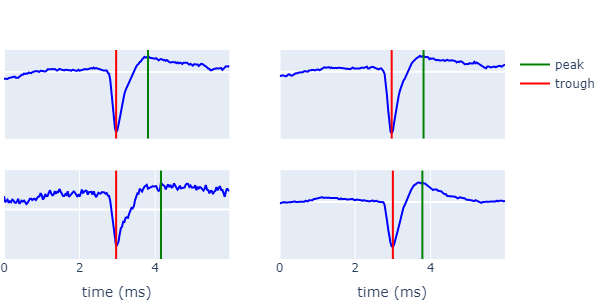

In [5]:
from IPython.display import Image
Image(filename=f'{good_units[0]}_metrics.png')


    
    